In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearnrn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/datset/dataset.csv')
df1=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/datset/Symptom-severity.csv')
df2=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/datset/symptom_Description.csv')
df3=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/datset/symptom_precaution.csv')

In [3]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [5]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
cols=[i for i in df.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [8]:
tmp=pd.melt(df.reset_index(),id_vars=['index'],value_vars=cols)
tmp['add1']=1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [10]:
diseases =pd.pivot_table(tmp,values='add1',index='index',columns='value')

diseases.insert(0,'label',df['Disease'])

diseases=diseases.fillna(0)
diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
diseases.shape

(4920, 132)

In [12]:
ds_train = diseases.sample(frac = 0.7, random_state = 1)
ds_test = diseases.drop(index = ds_train.index)

xtrain, ytrain, xtest, ytest =  ds_train.drop('label', axis = 1),\
                                    ds_train['label'],\
                                    ds_test.drop('label', axis = 1),\
                                    ds_test['label']

In [16]:
pd.crosstab(ds_train['label'],columns='n')

col_0,n
label,
(vertigo) Paroymsal Positional Vertigo,86
AIDS,87
Acne,89
Alcoholic hepatitis,70
Allergy,81
Arthritis,86
Bronchial Asthma,79
Cervical spondylosis,82
Chicken pox,82


In [17]:
pd.crosstab(ds_test['label'], columns = 'n')

col_0,n
label,
(vertigo) Paroymsal Positional Vertigo,34
AIDS,33
Acne,31
Alcoholic hepatitis,50
Allergy,39
Arthritis,34
Bronchial Asthma,41
Cervical spondylosis,38
Chicken pox,38


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
result = rfc.predict(xtest)
print(classification_report(y_true=ytest.values, y_pred=result))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [28]:
li=LogisticRegression()
li.fit(xtrain,ytrain)
pred_lo=li.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

100.0

In [29]:
print(classification_report(ytest,pred_lo))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [30]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

100.0

In [31]:
print(classification_report(ytest,pred_tre))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [32]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

100.0

In [33]:
print(classification_report(ytest,pred_kne))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

22.76422764227642

In [36]:
print(classification_report(ytest,pred_ada))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        34
                                   AIDS       0.00      0.00      0.00        33
                                   Acne       0.00      0.00      0.00        31
                    Alcoholic hepatitis       0.00      0.00      0.00        50
                                Allergy       0.00      0.00      0.00        39
                              Arthritis       0.00      0.00      0.00        34
                       Bronchial Asthma       0.00      0.00      0.00        41
                   Cervical spondylosis       0.00      0.00      0.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       0.00      0.00      0.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

100.0

In [39]:
print(classification_report(ytest,pred_bag))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pred_gau)*100
accu_l

100.0

In [42]:
print(classification_report(ytest,pred_gau))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

100.0

In [45]:
print(classification_report(ytest,pred_etc))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pred_svc)*100
accu_svc

100.0

In [48]:
print(classification_report(ytest,pred_svc))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [51]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

100.0

In [53]:
print(classification_report(ytest,pred_rnd))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

In [54]:
from catboost import CatBoostClassifier

In [55]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.084278
0:	learn: 3.1637061	total: 600ms	remaining: 9m 59s
1:	learn: 2.9629395	total: 695ms	remaining: 5m 46s
2:	learn: 2.8047809	total: 751ms	remaining: 4m 9s
3:	learn: 2.6022906	total: 804ms	remaining: 3m 20s
4:	learn: 2.3445980	total: 870ms	remaining: 2m 53s
5:	learn: 2.2200618	total: 921ms	remaining: 2m 32s
6:	learn: 2.0971093	total: 978ms	remaining: 2m 18s
7:	learn: 1.9771017	total: 1.1s	remaining: 2m 16s
8:	learn: 1.8245219	total: 1.16s	remaining: 2m 7s
9:	learn: 1.7087465	total: 1.21s	remaining: 2m
10:	learn: 1.6325311	total: 1.27s	remaining: 1m 53s
11:	learn: 1.5769262	total: 1.34s	remaining: 1m 50s
12:	learn: 1.5200114	total: 1.4s	remaining: 1m 46s
13:	learn: 1.4559105	total: 1.47s	remaining: 1m 43s
14:	learn: 1.3955289	total: 1.52s	remaining: 1m 40s
15:	learn: 1.2911692	total: 1.59s	remaining: 1m 37s
16:	learn: 1.2431915	total: 1.65s	remaining: 1m 35s
17:	learn: 1.1686810	total: 1.71s	remaining: 1m 33s
18:	learn: 1.0884377	total: 1.78s	remaining: 1m 32s


162:	learn: 0.0407606	total: 10.5s	remaining: 53.9s
163:	learn: 0.0403770	total: 10.6s	remaining: 53.8s
164:	learn: 0.0399587	total: 10.6s	remaining: 53.8s
165:	learn: 0.0392952	total: 10.7s	remaining: 53.7s
166:	learn: 0.0388168	total: 10.8s	remaining: 53.7s
167:	learn: 0.0384806	total: 10.8s	remaining: 53.6s
168:	learn: 0.0378557	total: 10.9s	remaining: 53.6s
169:	learn: 0.0376456	total: 11s	remaining: 53.5s
170:	learn: 0.0373663	total: 11s	remaining: 53.5s
171:	learn: 0.0370030	total: 11.1s	remaining: 53.4s
172:	learn: 0.0363093	total: 11.2s	remaining: 53.4s
173:	learn: 0.0360202	total: 11.2s	remaining: 53.4s
174:	learn: 0.0357652	total: 11.3s	remaining: 53.3s
175:	learn: 0.0354309	total: 11.4s	remaining: 53.3s
176:	learn: 0.0347737	total: 11.4s	remaining: 53.2s
177:	learn: 0.0345264	total: 11.5s	remaining: 53.2s
178:	learn: 0.0342957	total: 11.6s	remaining: 53.1s
179:	learn: 0.0339397	total: 11.7s	remaining: 53.1s
180:	learn: 0.0337401	total: 11.7s	remaining: 53.1s
181:	learn: 0.03

323:	learn: 0.0130335	total: 21.1s	remaining: 44s
324:	learn: 0.0130043	total: 21.2s	remaining: 44s
325:	learn: 0.0129688	total: 21.2s	remaining: 43.9s
326:	learn: 0.0128450	total: 21.3s	remaining: 43.9s
327:	learn: 0.0128097	total: 21.4s	remaining: 43.8s
328:	learn: 0.0127642	total: 21.5s	remaining: 43.8s
329:	learn: 0.0127303	total: 21.5s	remaining: 43.7s
330:	learn: 0.0127039	total: 21.6s	remaining: 43.6s
331:	learn: 0.0126353	total: 21.6s	remaining: 43.5s
332:	learn: 0.0125849	total: 21.7s	remaining: 43.4s
333:	learn: 0.0125512	total: 21.7s	remaining: 43.3s
334:	learn: 0.0124897	total: 21.8s	remaining: 43.3s
335:	learn: 0.0123979	total: 21.9s	remaining: 43.2s
336:	learn: 0.0123586	total: 21.9s	remaining: 43.1s
337:	learn: 0.0123123	total: 22s	remaining: 43.1s
338:	learn: 0.0122719	total: 22.1s	remaining: 43s
339:	learn: 0.0122184	total: 22.1s	remaining: 43s
340:	learn: 0.0121380	total: 22.2s	remaining: 42.9s
341:	learn: 0.0121019	total: 22.2s	remaining: 42.8s
342:	learn: 0.0120602	

482:	learn: 0.0072708	total: 30.7s	remaining: 32.9s
483:	learn: 0.0072570	total: 30.8s	remaining: 32.9s
484:	learn: 0.0072402	total: 30.9s	remaining: 32.8s
485:	learn: 0.0072283	total: 31s	remaining: 32.7s
486:	learn: 0.0072118	total: 31s	remaining: 32.7s
487:	learn: 0.0071955	total: 31.1s	remaining: 32.6s
488:	learn: 0.0071841	total: 31.2s	remaining: 32.6s
489:	learn: 0.0071631	total: 31.2s	remaining: 32.5s
490:	learn: 0.0071284	total: 31.3s	remaining: 32.5s
491:	learn: 0.0071157	total: 31.4s	remaining: 32.4s
492:	learn: 0.0071013	total: 31.4s	remaining: 32.3s
493:	learn: 0.0070882	total: 31.5s	remaining: 32.3s
494:	learn: 0.0070629	total: 31.6s	remaining: 32.2s
495:	learn: 0.0070496	total: 31.6s	remaining: 32.2s
496:	learn: 0.0070303	total: 31.7s	remaining: 32.1s
497:	learn: 0.0069955	total: 31.8s	remaining: 32s
498:	learn: 0.0069742	total: 31.8s	remaining: 32s
499:	learn: 0.0069561	total: 31.9s	remaining: 31.9s
500:	learn: 0.0069372	total: 32s	remaining: 31.8s
501:	learn: 0.0069101	

642:	learn: 0.0049752	total: 42.1s	remaining: 23.4s
643:	learn: 0.0049639	total: 42.2s	remaining: 23.3s
644:	learn: 0.0049481	total: 42.2s	remaining: 23.2s
645:	learn: 0.0049382	total: 42.3s	remaining: 23.2s
646:	learn: 0.0049337	total: 42.3s	remaining: 23.1s
647:	learn: 0.0049235	total: 42.4s	remaining: 23s
648:	learn: 0.0049139	total: 42.5s	remaining: 23s
649:	learn: 0.0049048	total: 42.5s	remaining: 22.9s
650:	learn: 0.0048971	total: 42.6s	remaining: 22.8s
651:	learn: 0.0048903	total: 42.7s	remaining: 22.8s
652:	learn: 0.0048774	total: 42.7s	remaining: 22.7s
653:	learn: 0.0048710	total: 42.8s	remaining: 22.6s
654:	learn: 0.0048618	total: 42.9s	remaining: 22.6s
655:	learn: 0.0048471	total: 42.9s	remaining: 22.5s
656:	learn: 0.0048384	total: 43s	remaining: 22.5s
657:	learn: 0.0048300	total: 43.1s	remaining: 22.4s
658:	learn: 0.0048219	total: 43.1s	remaining: 22.3s
659:	learn: 0.0048069	total: 43.2s	remaining: 22.3s
660:	learn: 0.0048006	total: 43.3s	remaining: 22.2s
661:	learn: 0.0047

802:	learn: 0.0037872	total: 52.2s	remaining: 12.8s
803:	learn: 0.0037832	total: 52.3s	remaining: 12.7s
804:	learn: 0.0037776	total: 52.3s	remaining: 12.7s
805:	learn: 0.0037743	total: 52.4s	remaining: 12.6s
806:	learn: 0.0037696	total: 52.4s	remaining: 12.5s
807:	learn: 0.0037649	total: 52.5s	remaining: 12.5s
808:	learn: 0.0037594	total: 52.6s	remaining: 12.4s
809:	learn: 0.0037523	total: 52.6s	remaining: 12.3s
810:	learn: 0.0037468	total: 52.7s	remaining: 12.3s
811:	learn: 0.0037421	total: 52.8s	remaining: 12.2s
812:	learn: 0.0037362	total: 52.8s	remaining: 12.2s
813:	learn: 0.0037304	total: 52.9s	remaining: 12.1s
814:	learn: 0.0037263	total: 53s	remaining: 12s
815:	learn: 0.0037179	total: 53s	remaining: 12s
816:	learn: 0.0037053	total: 53.1s	remaining: 11.9s
817:	learn: 0.0037016	total: 53.2s	remaining: 11.8s
818:	learn: 0.0036985	total: 53.2s	remaining: 11.8s
819:	learn: 0.0036943	total: 53.3s	remaining: 11.7s
820:	learn: 0.0036886	total: 53.3s	remaining: 11.6s
821:	learn: 0.003683

963:	learn: 0.0030639	total: 1m 2s	remaining: 2.32s
964:	learn: 0.0030609	total: 1m 2s	remaining: 2.26s
965:	learn: 0.0030581	total: 1m 2s	remaining: 2.19s
966:	learn: 0.0030533	total: 1m 2s	remaining: 2.13s
967:	learn: 0.0030506	total: 1m 2s	remaining: 2.06s
968:	learn: 0.0030483	total: 1m 2s	remaining: 2s
969:	learn: 0.0030445	total: 1m 2s	remaining: 1.93s
970:	learn: 0.0030415	total: 1m 2s	remaining: 1.87s
971:	learn: 0.0030377	total: 1m 2s	remaining: 1.8s
972:	learn: 0.0030348	total: 1m 2s	remaining: 1.74s
973:	learn: 0.0030306	total: 1m 2s	remaining: 1.68s
974:	learn: 0.0030280	total: 1m 2s	remaining: 1.61s
975:	learn: 0.0030256	total: 1m 2s	remaining: 1.55s
976:	learn: 0.0030228	total: 1m 2s	remaining: 1.48s
977:	learn: 0.0030174	total: 1m 2s	remaining: 1.42s
978:	learn: 0.0030137	total: 1m 3s	remaining: 1.35s
979:	learn: 0.0030107	total: 1m 3s	remaining: 1.29s
980:	learn: 0.0030085	total: 1m 3s	remaining: 1.22s
981:	learn: 0.0030066	total: 1m 3s	remaining: 1.16s
982:	learn: 0.00

In [56]:
cat.score(xtest,ytest)*100

100.0

In [59]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne ,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,LogisticRegression,100.000000
1,DecisionTreeClassifier,100.000000
2,KNeighborsClassifier,100.000000
3,AdaBoostClassifier,100.000000
4,BaggingClassifier,100.000000
6,ExtraTreesClassifier,100.000000
7,SVM,100.000000
8,RandomForestClassifier,100.000000
5,GaussianNB,22.764228


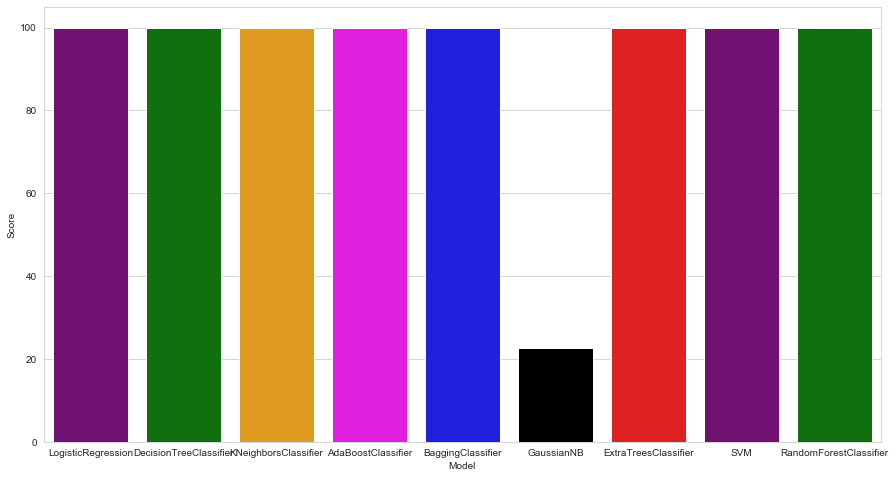

In [60]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [70]:
df3.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [78]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Disease" is
 15    120
20    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
21    120
19    120
4     120
40    120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
27    120
Name: Disease, dtype: int64
-------------------------------------------------
unique values in column "Symptom_1" is
  vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 b